# Timestable Spiral Art

In this notebook we turn a simpel educational tool for making art from times table sequences into a simpel computer program that removes most if not all of the educational part of the task. Probably the easiest way to access this notebook is via the link below to Google Colab.

[![Google Colab](https://colab.research.google.com/img/colab_favicon.ico)](https://colab.research.google.com/github/nichol77/timesTableArt/blob/main/timesTableArt.ipynb)




## How it works?

The steps to making a timestable art spiral are:
1. Write out a timestable e.g 3,6,9,12,15
2. Sum the digits in the values e.g. 3,6,9,3,6 where '12' -> '3' and '15'-> '6'
3. On grid paper do the following loop:
    a. Draw a line of length the value in the sum
    b. Turn 90 degrees clockwise and move to the next value in the sum
4. Keep going until you are happy with the pattern

### What the code does?
This notebook uses numpy and matplotlib to codify that process. The rather clunky `convertNumToSum` converts an integer number into the sum of its digits. Whilst `doTimesTablePattern` actually makes a figure with that pattern.

So for example:
`doTimesTablePattern(3,12)`
will draw the 3 pattern from 12 steps.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import math

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

In [2]:
MAX_STEPS=1000
indices=np.arange(1,MAX_STEPS+1)  #An array of integers from 1 to MAX_STEPS
mods=indices%4 # The index modulo 4 (so 0, 1, 2 or 3) which we will map to North, South, East and West
north=[0,1]  # The x, y step size for a move north
east=[1,0] # The x, y step size for a move east
south=[0,-1] # The x, y step size for a move south
west=[-1,0] # The x, y step size for a move west
dirs = np.zeros((len(indices),2)) #An empty array we will populate with directions
dirs[mods==1]=north #Adding north (the mods==1 returns an array of trues and falses for everywhere that index%4 == 1)
dirs[mods==2]=east #Adding east (the mods==2 returns an array of trues and falses for everywhere that index%4 == 2)
dirs[mods==3]=south #Adding south (the mods==3 returns an array of trues and falses for everywhere that index%4 == 3)
dirs[mods==0]=west #Adding west (the mods==0 returns an array of trues and falses for everywhere that index%4 == 0)
#print(dirs)

In [3]:
def convertNumToSum(number):
    #Returns sum of a digits in a number, so if number=345 the function will return 12.

    #Parameters:
    #    number (int): The integer whose digits are to be summed

    #Returns:
    #    sum (int): The sum of the digits in the number.
    temp1=np.array(number)
    sum=0
    for ind in range(1,20):
        pow10=math.pow(10,ind)
        rem=(temp1%pow10)
        sum=sum+rem/(pow10/10)
        temp1=temp1-rem
    return sum


In [4]:
def makeFigure(deltas,numsteps,title=""):
    #Under the hood workhorse function that takes the array of deltas and returns the plot.

    #Parameters:
    #    deltas (array): 2D Array of the x,y steps for each line in our figure
    #    numsteps (int): The number of steps we actually want to plot

    #Returns:
    #    fig,ax: The fig and ax objects of the plot
    fig,ax = plt.subplots()  #Standard matplotlib way of making a plot
    start=np.array([0,0]) #Will always start at x,y = 0,0
    minxval=0 #The min,max variables are just used for plotting the grid with integer spaces
    maxxval=0
    minyval=0
    maxyval=0
    for ind in range(numsteps):  # Loop over the range from 0, numsteps-1
        next=start+deltas[ind] #Pick the next step from the deltas array
        minxval=np.min([minxval,next[0]])  #Update the various min, max variables clunky but works for now
        maxxval=np.max([maxxval,next[0]])
        minyval=np.min([minyval,next[1]])
        maxyval=np.max([maxyval,next[1]])
        x=[start[0],next[0]]  #We actually plot the lines using ax.plot which takes an array of x values 
        y=[start[1],next[1]] # and an array of y-values
        lines = ax.plot(x, y,lw=3,alpha=0.5)  # Here is the actual line segment, could change style here
        start=next
    ax.set_aspect('equal', 'box')  # I like the the grid to be square
    ax.set_xticks(ticks=np.arange(minxval-1,maxxval+1))  #Now setting up for the integer gird
    ax.set_xticklabels([]) #But without the labels
    ax.set_yticks(ticks=np.arange(minyval-1,maxyval+1))
    ax.set_yticklabels([])
    ax.grid(alpha=0.1) #Add the grid
    if title:
        ax.set_title(title) # Add the title
    return fig,ax


def doTimesTablePattern(number,numsteps,addTitle=True):
    #The main function that takes the number for the times table

    #Parameters:
    #    number (int): Which timetable are we going to use to make art
    #    numsteps (int): The number of steps we actually want to plot

    #Returns:
    #    fig,ax: The fig and ax objects of the plot
    if numsteps > MAX_STEPS:  #Checking if we have asked for too many steps
        print("Can't have numsteps greater than",MAX_STEPS)
        return
    nums=indices*number  #Here this does the timestable multiplication in one line
    numsum=convertNumToSum(nums) # Now we convert each element in to the sum of its digits
    deltas=numsum[:, None]*dirs # Here the length of each step is taken from numsum and the direction from dirs
    title=""
    if addTitle:
        title=str(number)+"-times table : "+str(numsteps)+" steps"  # Can change the title if you wush
    return makeFigure(deltas,numsteps,title) #Actually get and retrun the plot

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '3-times table : 12 steps'}>)

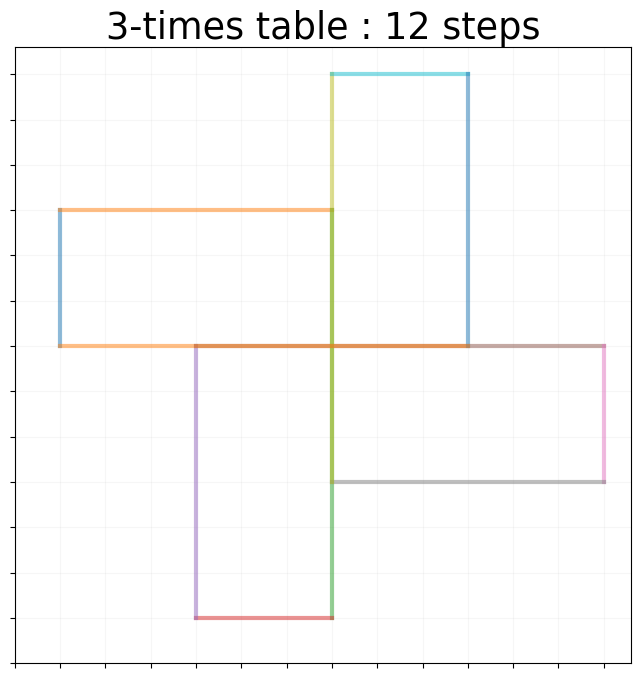

In [5]:
doTimesTablePattern(3,12)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '4-times table : 500 steps'}>)

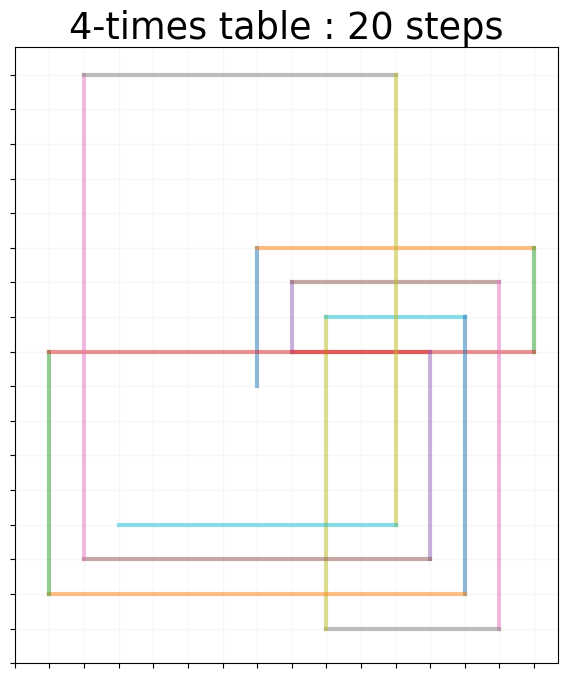

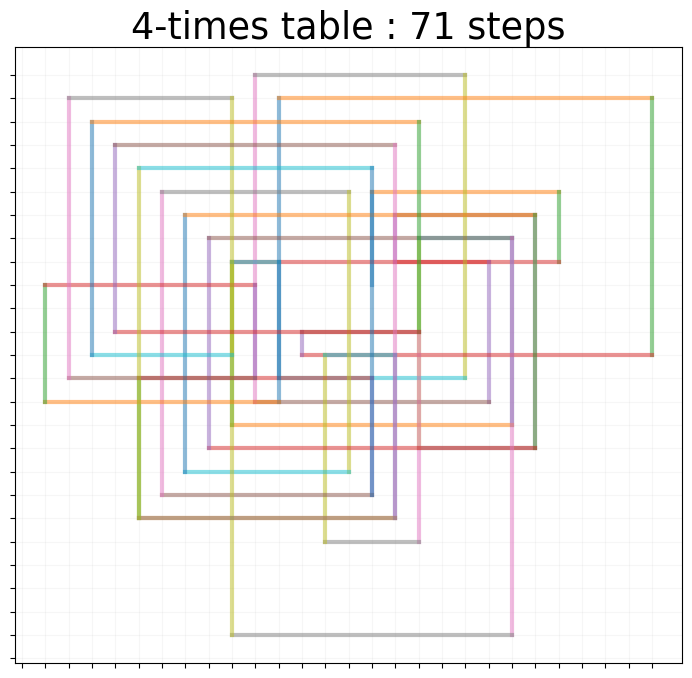

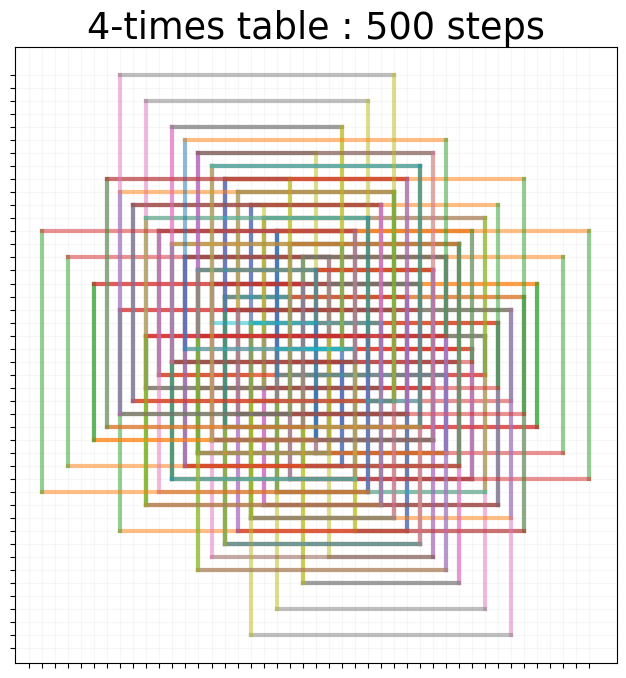

In [6]:
doTimesTablePattern(4,20)
doTimesTablePattern(4,71)
doTimesTablePattern(4,500)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '5-times table : 500 steps'}>)

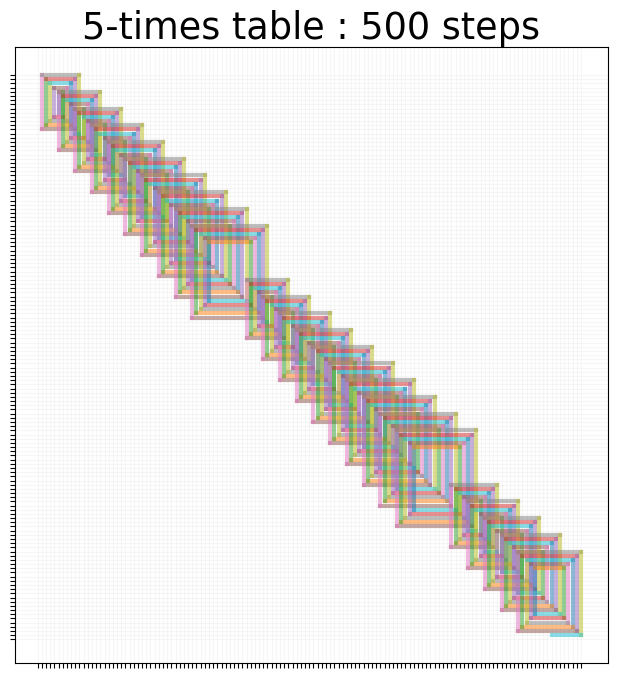

In [7]:
doTimesTablePattern(5,500)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '1-times table : 300 steps'}>)

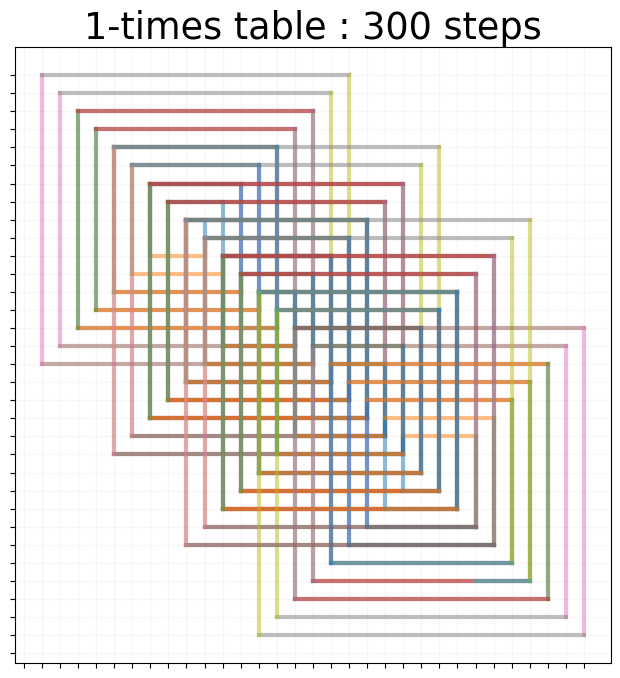

In [8]:
doTimesTablePattern(1,300)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '9-times table : 230 steps'}>)

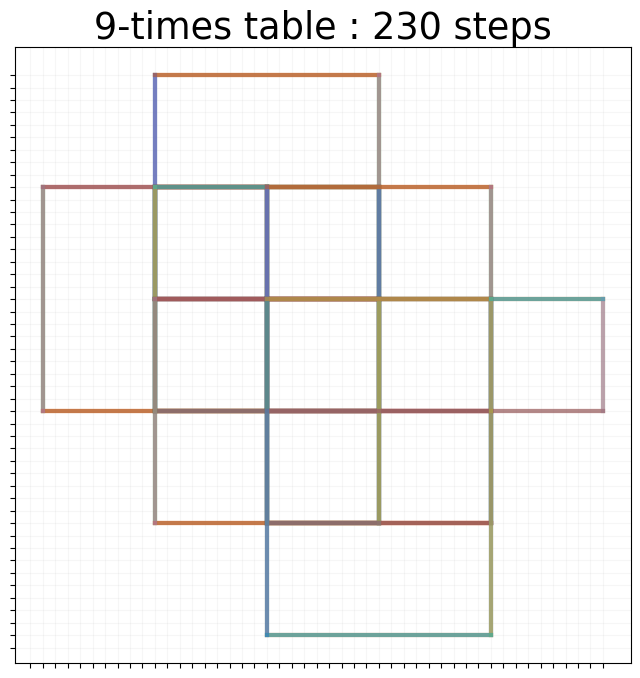

In [9]:
doTimesTablePattern(9,230)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '6-times table : 324 steps'}>)

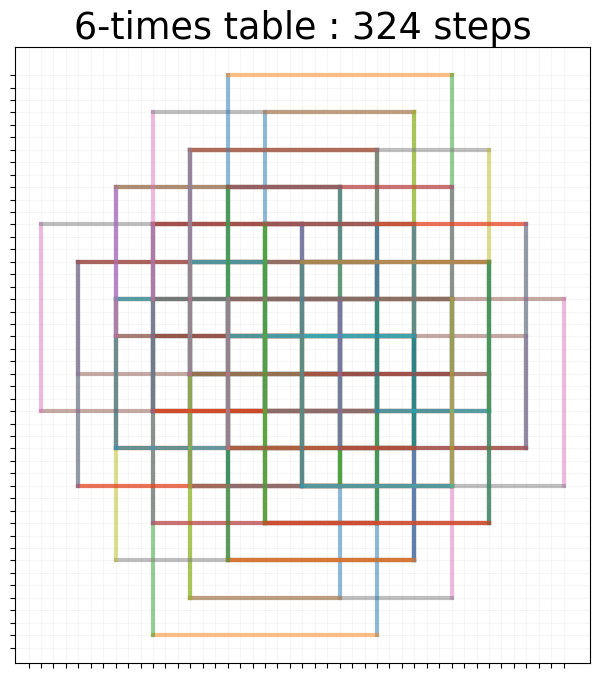

In [10]:
doTimesTablePattern(6,324)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '5-times table : 503 steps'}>)

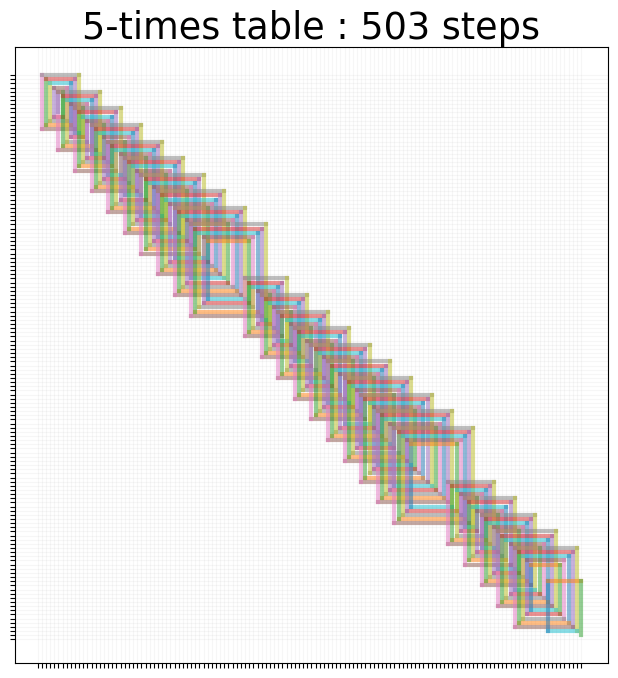

In [11]:
doTimesTablePattern(5,503)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '8-times table : 764 steps'}>)

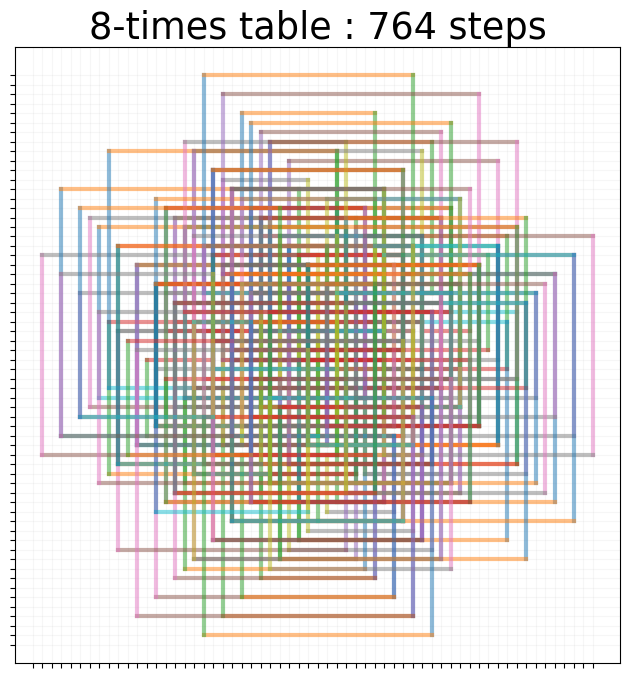

In [12]:
doTimesTablePattern(8,764)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '4-times table : 987 steps'}>)

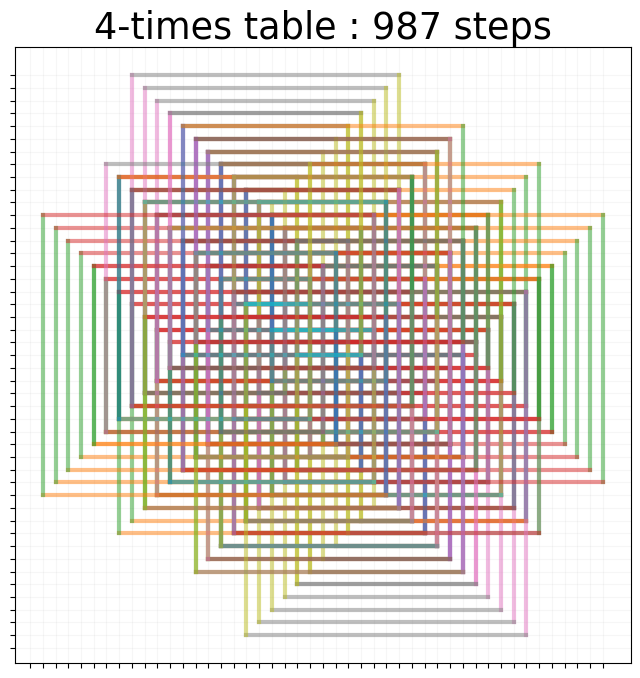

In [13]:
doTimesTablePattern(4,987)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': '4-times table : 900 steps'}>)

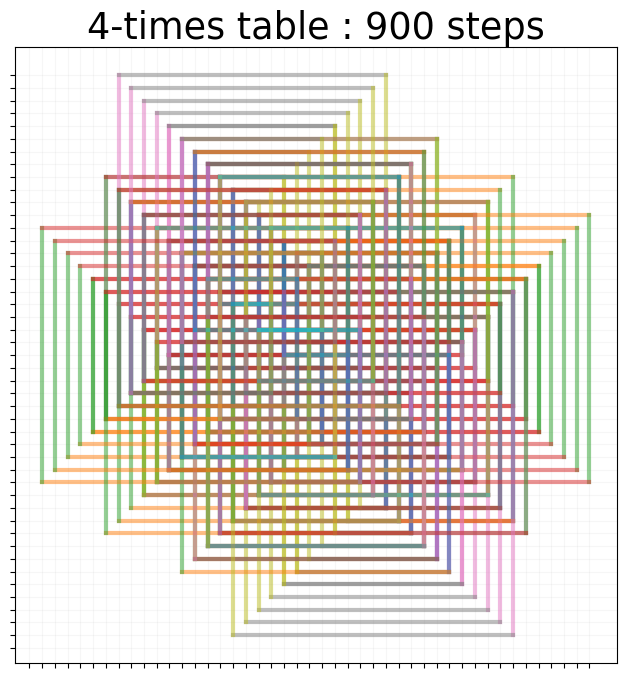

In [14]:
doTimesTablePattern(4,900)